# Évolution des quantités de matière lors d'un titrage #

**Objectif :** Il s'agit de simuler l'évolution des quantités de matière des réactif titré et titrant lors d'un titrage en fonction du volume de réactif titrant versé.<br>
L'équation de la réaction chimique support du titrage est la suivante  :<br>
**a A + b B ---> Produits**<br>
A est le réactif titré et B le réactif titrant.
On entre l'ensemble des paramètres du titrage afin de mettre en évidence graphiquement le changement de réactif limitant lors de l'équivalence :
* le coefficient stoechiométrique du réactif titré, noté **a** ;
* le coefficient stoechiométrique du réactif titré, noté **b** ;
* la concentration molaire de la solution titrée, notée **Ctitree** ;
* la concentration molaire de la solution titrante, notée **Ctitrante** ;
* le volume de solution titrée prélevé, noté **V**.

In [1]:
# Importation de la bibliothèque permettant de tracer les graphiques
%matplotlib inline
import matplotlib.pyplot as plt
# Importation de la bibliothèque numpy pour les listes
import numpy as np

## Définition d'une fonction permettant de calculer l'avancement maximal ##

Il s'agit de calculer l'avancement maximal afin d'en déduire les quantités de matière des deux réactifs.<br>
Les paramètres de la fonction sont le coefficient stoechiométrique **a** du réactif A, **na** sa quantité de matière, le coefficient stoechiométrique **b** du réactif B et **nb** sa quantité de matière.
En vous appuyant éventuellement sur un tableau d'avancement, répondez aux questions suivantes.
1. Quelle est l'expression de l'avancement maximal en fonction de **na** et **a** si le réactif A est limitant ?
2. Quelle est l'expression de l'avancelent maximal en fonction de **nb** et **b** si le réactif B est limitant ?
3. Quelle est la valeur de l'avancement maximal retenue ?
4. Exploiter les réponses précédentes pour compléter la fonction ci-dessous qui doit renvoyer la valeur de l'avancement maximal.
Remarque : les fonction *min()* et *max()* permettent de déterminer le minimum ou le maximum d'une liste de valeurs.

In [2]:
def avancementMax(a, na, b, nb) :
    xMax = min(na / a, nb / b)
    return xMax

## Entrée des paramètres du titrage par l'utilisateur ##

Les lignes ci-dessous interrogent l'utilisateur afin qu'il entre les paramètres du titrage.<br>
ATTENTION : le séparateur décimal est le **'.'**, et pas la **','**.<br>
Répondez aux questions en reprenant les paramètres d'un des titrages réalisés en travaux pratiques : titrage du dioxyde de soufre, dureté de l'eau ou dosage de la vitamine C dans le jus de citron.

In [3]:
print("ÉQUATION DE LA RÉACTION SUPPORT DU TITRAGE")
print("a A + b B --> Produits")
print("A est le réactif TITRÉ et B est le réactif TITRANT.")

a = int(input("Entrez le coefficient stoechiométrique du réactif titré : "))
b = int(input("Entrez le coefficient stoechiométrique du réactif titrant : "))
Ctitre = float(input("Entrez la concentration du réactif titré en mol/L : "))
Vtitre = float(input("Entrez le volume de réactif titré prélevé en mL : "))
Ctitrant = float(input("Entrez la concentration du réactif titrant en mol/L : "))

ÉQUATION DE LA RÉACTION SUPPORT DU TITRAGE
a A + b B --> Produits
A est le réactif TITRÉ et B est le réactif TITRANT.


Entrez le coefficient stoechiométrique du réactif titré :  2
Entrez le coefficient stoechiométrique du réactif titrant :  3
Entrez la concentration du réactif titré en mol/L :  0.025
Entrez le volume de réactif titré prélevé en mL :  0.025
Entrez la concentration du réactif titrant en mol/L :  0.025


## Initialisation des listes et constantes ##

**On crée :**
* la liste contenant le volume de réactif titrant **Vtitrant** versé : maximum 25 mL, par intervalles de 0,05 mL comme les graduations des burettes utilisées ;
* la liste **na** pour la quantité de matière du réactif titré ;
* la liste **nb** pour la quantité de matière du réactif titrant ;
* la quantité de matière initiale de réactif titré **na0** ;
* une liste pour le volume de solution titrante versé **Vtitrant** : correspondant à une burette de 25 mL, graduée tous les 0.5 mL.

Afin de compléter la ligne définissant na0, répondez à la question suivante :<br>
*Quelle est la relation entre **na0**, la concentration **Ctitre** et le volume prélevé **Vtitre** ?*<br>
Complétez la ligne manquante en conséquence.

In [4]:
Vtitrant = np.linspace(0, 25., 501)
na = []
nb = []
na0 = Ctitre * Vtitre / 1000.
Vtitrant = np.linspace(0, 25., 501)  # On limite les variations du volume de réactif titrant au volume d'une burette de 25 mL

## Calcul des quantités de matières dans le système en fonction du volume de réactif titrant versé ##

La quantité de matière initiale du réactif titré **na0** est déterminée une seule fois alors que la quantité de matière initiale **nb0** de réactif titré introduit dans le système est calculée pour chaque valeur du volume versé.<br>
On complète les listes **na** et **nb** respectivement avec la quantité de matière finale une fois que les deux réactifs ont réagi complètement.<br>
En vous aidant si besoin d'un tableau d'avancement :
1. Donnez l'expression de **na** en fonction de **a**, **na0** et **Xmax**.
2. Donnez l'expression de **nb** en fonction de **b**, **nb0** et **Xmax**.
En python, l'ajout d'une valeur à une liste se fait par la fonction *append* en la précédant du nom de la liste concernée.<br>
Complétez les lignes de code ci-dessous en vous appuyant sur vos réponses précédentes.

In [5]:
for v in Vtitrant :  # Pour toutes les valeurs de volume versé à la burette
    nb0 = Ctitrant * v / 1000  # Calcul de la quantité de matière de réactif titrant versé en fonction de Ctitrant et v
    xMax = avancementMax(a, na0, b, nb0)  # Détermination de la valeur de l'avancement maximal à partir des quantités de matière initiales na0 et nb0
    na.append(na0 - a * xMax)  # Compléter avec une expression basée sur votre réponse à la question 1.
    nb.append(nb0 - b * xMax)  # Compléter avec une expression basée sur votre réponse à la question 2.

## Tracé des variations des quantités de matière des réactifs ##

Vous pouvez compléter les légendes des axes pour qu'elles correspondent au phénomène simulé.

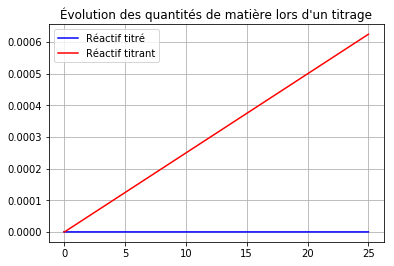

In [6]:
plt.plot(Vtitrant, na, color = "blue", label = "Réactif titré")
plt.plot(Vtitrant, nb, color = "red", label = "Réactif titrant")
plt.title("Évolution des quantités de matière lors d'un titrage")
plt.xlabel("")  # Légende de l'axe des abscisses
plt.ylabel("")  # Légende de l'axe des ordonnées
plt.grid()  # Affichage de la grille
plt.legend()  # Affichage de la légende
plt.show()  # Affichage du graphique (utile si vous téléchargez le code complet au format .py)

1. Comment repère-t-on le volume versé à l'aquivalence sur le graphique ?
2. Quel est le réactif limitant AVANT l'équivalence ? Comment cela se manifeste-t-il graphiquement ?
3. Quel est le réactif limitant APRÈS l'équivalence ? Comment cela se manifeste-t-il graphiquement ?